<h1 style="background-color:DodgerBlue; "> Anamoly detection ::Statistical Methods- Z Score</h1>


## 🧪 **Scenario: Temperature Sensor Data**

We’ll simulate a temperature sensor that normally records room temperatures, say in a server room. 
Most values are around 22°C ± 2°C, but occasionally it spikes (malfunction, fire alarm, etc.).



### 🐍 **1. Create the Data**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Seed for reproducibility
np.random.seed(42)

# Simulate 100 normal room temperature readings around 22°C
normal_temps = np.random.normal(loc=22, scale=1.5, size=100)

# Add 5 anomaly temperatures (spikes)
anomalies = np.array([30, 32, 5, 35, 3])  # Extreme temps

# Combine the data
temps = np.concatenate((normal_temps, anomalies))
timestamps = pd.date_range("2023-01-01", periods=len(temps), freq="H")

df = pd.DataFrame({'timestamp': timestamps, 'temperature': temps})
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10456\1681675587.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range("2023-01-01", periods=len(temps), freq="H")


,timestamp,temperature
0,2023-01-01 00:00:00,22.745071
1,2023-01-01 01:00:00,21.792604
2,2023-01-01 02:00:00,22.971533
3,2023-01-01 03:00:00,24.284545
4,2023-01-01 04:00:00,21.648770


### 🔎 **2. Apply Z-score Method**

In [7]:
df['z_score'] = zscore(df['temperature'])
df['anomaly'] = df['z_score'].apply(lambda x: abs(x) > 3)
df.head()

,timestamp,temperature,z_score,anomaly
0,2023-01-01 00:00:00,22.745071,0.282501,False
1,2023-01-01 01:00:00,21.792604,-0.003430,False
2,2023-01-01 02:00:00,22.971533,0.350485,False
3,2023-01-01 03:00:00,24.284545,0.744651,False
4,2023-01-01 04:00:00,21.648770,-0.046609,False


In [9]:
# Outliers
df [ df['anomaly'] == True ]

,timestamp,temperature,z_score,anomaly
101,2023-01-05 05:00:00,32.0,3.060832,True
102,2023-01-05 06:00:00,5.0,-5.044572,True
103,2023-01-05 07:00:00,35.0,3.961433,True
104,2023-01-05 08:00:00,3.0,-5.644972,True


### 📊 **3. Visualize the Anomalies**

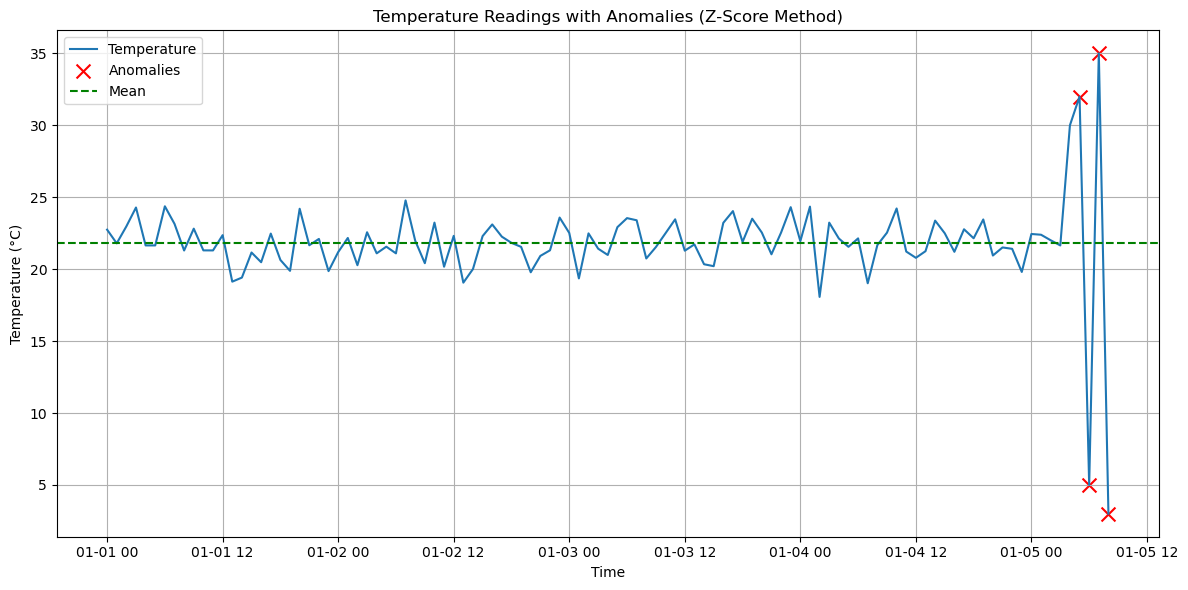

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.scatter(df[df['anomaly']]['timestamp'], 
            df[df['anomaly']]['temperature'], 
            color='red', label='Anomalies', s=100, marker='x')
plt.axhline(df['temperature'].mean(), color='green', linestyle='--', label='Mean')
plt.title('Temperature Readings with Anomalies (Z-Score Method)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




### 🧠 **Interpretation**

- 🔥 **Red Xs** = Anomalies detected via Z-score (they're too far from the mean).
- 📈 **Dashed Green Line** = Mean temperature (approx. 22°C).
- ✅ This method assumes a **normal distribution**, which works here because our data was generated that way.

